In [122]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


In [127]:
with open('memory_profiler.log') as f:
    lines = f.readlines()




lines[6][22:28]
num_items = np.arange(0,50000,1000)
mem = []
for i in lines:
    if " 33 " in i:
        mem.append(float(i[22:28]))


ValueError: x and y must have same first dimension, but have shapes (50,) and (0,)

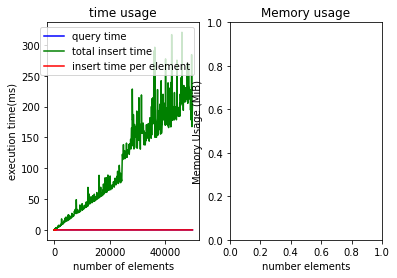

In [128]:
time = pd.read_csv("time_benchmark.csv",delimiter=',',index_col=0)

fig, (ax1,ax2) = plt.subplots(1,2)



ax1.plot(time["query"],label = "query time",color = 'b')
ax1.plot(time["insert_total"],label = "total insert time",color = 'g')
ax1.plot(time["insert_total"]/time.index,label = "insert time per element",color = 'red')
ax1.set_xlabel("number of elements")
ax1.set_ylabel("execution time(ms)")
ax1.set_title("time usage")

ax1.legend()



ax2.set_xlabel("number elements")
ax2.set_ylabel("Memory Usage (MiB)")
ax2.set_title("Memory usage")
ax2.plot(num_items,mem)
fig.tight_layout(pad=2.0)
